<a href="https://colab.research.google.com/github/rodr1ggoql17/Procesamiento-Digital-Informacion/blob/main/pdi_ejercicio_tipo_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tareas a desarrollar en clase
Descargar la imagen leaves.jpg desde el repositorio https://github.com/jorgevergara/PDI y utilice técnicas de procesamiento de imágenes que estime conveniente para segmentar las hojas más oscuras. Recuerde que debe eliminar todo rastro de tallo de las hojas.

Desde la imagen coin desde from skimage import data obtenga lo siguiente

2.1. Encuentre el umbral óptimo para diferenciar todas las monedas con respecto al fondo.

2.2 Utilizando el filtro canny (from skimage.feature import canny) detecte los bordes de las monedas. Compare su resultado con el filtro de deteccion de bordes visto en clases (sobel)

2.3 Utilice la función ndi.binary_fill_holes desde from scipy import ndimage as ndi para rellenar los huecos desde el ejercicio 2.2

2.4 Utilice las estrategias de apertura y cerrado para eliminar los elementos que no son monedas

2.5 Utilice erosión y dilatación para obtener los bordes de las monedas (dilatación - erosión

In [ ]:
import skimage.io as io
import matplotlib.pylab as plt
import numpy as np

# Solucion parte 1

In [ ]:
img1 = io.imread('https://raw.githubusercontent.com/jorgevergara/PDI/main/leaves.jpg',as_gray=True)
img1

array([[0.6973102 , 0.72083961, 0.77574157, ..., 0.11954392, 0.1352302 ,
        0.11954392],
       [0.68946706, 0.71691804, 0.77574157, ..., 0.10777922, 0.11170078,
        0.11170078],
       [0.68554549, 0.71299647, 0.77574157, ..., 0.13130863, 0.12738706,
        0.11954392],
       ...,
       [0.17520549, 0.15167608, 0.17184941, ..., 0.41404824, 0.33169529,
        0.39836196],
       [0.12144235, 0.10772039, 0.11528078, ..., 0.35828314, 0.39301176,
        0.39301176],
       [0.11920235, 0.13488863, 0.10772039, ..., 0.36499529, 0.38292157,
        0.38292157]])

In [ ]:
img1.shape

(3344, 2736)

In [ ]:
print('Max: ',img1.max())
print('Min: ',img1.min())

Max:  1.0
Min:  0.0


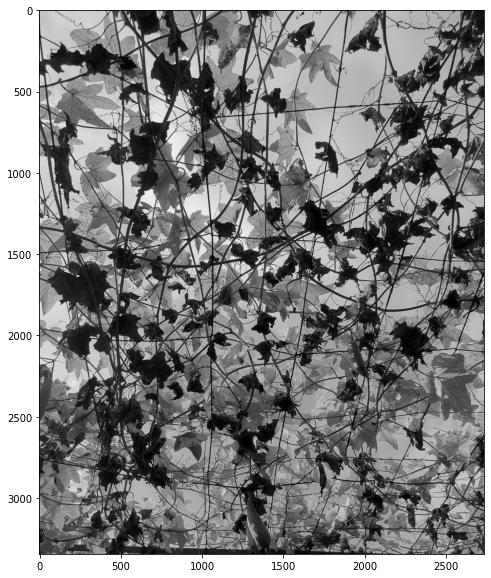

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img1,cmap='gray')

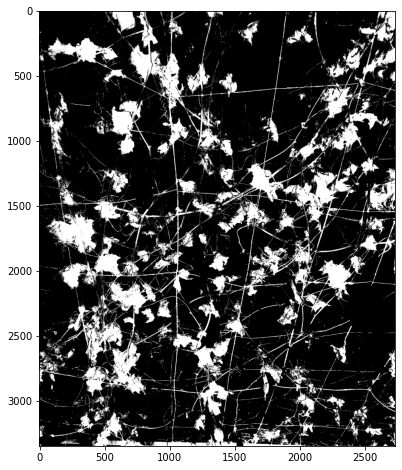

In [ ]:
plt.figure(figsize=(8,8))
th = 0.15
plt.imshow(img1<th,cmap="gray")

In [ ]:
# eliminar todo rastro de tallo de las hojas.
f = np.ones((7,7)) # filtros
# para eliminar los tallos aplicamos erosión
def erosio1(img1,kernel): # donde kernel es el filtro
  nfi,nci = img1.shape
  nfk,nck = kernel.shape
  res = np.zeros((nfi-nfk+1,nci-nck+1))
  for i in range(0,nfi-nfk+1):
    for j in range(0,nci-nck+1):
      temp = img1[i:i+nfk,j:j+nck] * kernel
      if temp.sum() == kernel.sum():
        res[i,j] = 1
  return res

In [ ]:
im_binary = img1<0.15
A = erosion(im_binary,f)

In [ ]:
from skimage.morphology.max_tree import area_closing
from skimage.morphology import (erosion, dilation, closing, opening , area_closing, area_opening)

In [ ]:
f = np.ones((7,7)) # filtros
im_binary = img1<0.15
A = erosion(im_binary,f)

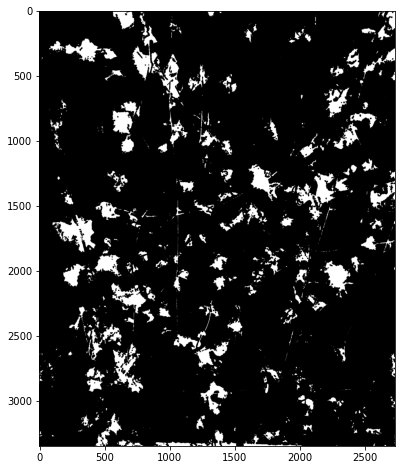

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(A,cmap='gray')

# SOLUCION PARTE 2


In [ ]:
from skimage import data

In [ ]:
coins = data.coins()

In [ ]:
print('MAX: ',coins.max())
print('MIN: ',coins.min())

MAX:  252
MIN:  1


In [ ]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

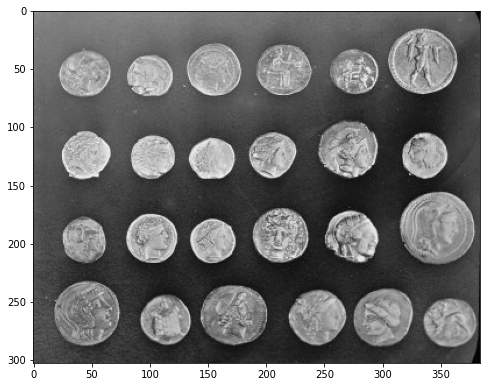

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(coins,cmap='gray')

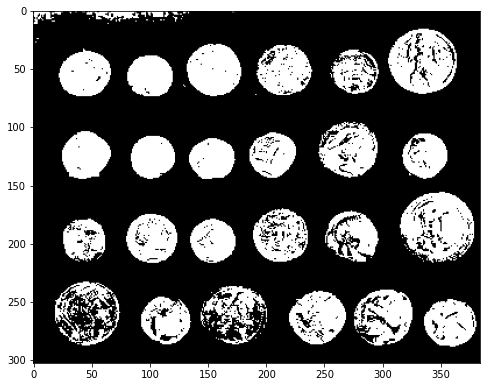

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(coins>130,cmap='gray')

In [ ]:
 # equalizacion histograma
# from skimage.morphology import * # no es muy recomendable importar todo , es preferible importar la funcion que usaremos
 from skimage.exposure import equalize_hist

In [ ]:
coins_imp = equalize_hist(coins,256) # 256 son los bins (el maximo de la imagen)
coins.max()

252

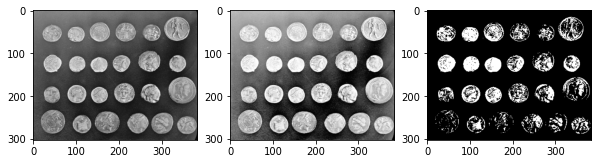

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(coins,cmap='gray')
axes[1].imshow(coins_imp,cmap='gray')
axes[2].imshow(coins>160,cmap='gray')

In [ ]:
from scipy import signal

array([[ 8.81498733e-15,  9.19824765e-15,  7.66520638e-15, ...,
         3.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [ 1.53304128e-15,  1.53304128e-15,  2.29956191e-15, ...,
         6.00000000e+00,  4.00000000e+00,  2.00000000e+00],
       [ 9.19824765e-15,  6.89868574e-15,  1.07312889e-14, ...,
         9.00000000e+00,  6.00000000e+00,  3.00000000e+00],
       ...,
       [ 2.00000000e+00,  4.00000000e+00,  6.00000000e+00, ...,
        -4.59912383e-15, -6.13216510e-15, -1.07312889e-14],
       [ 2.00000000e+00,  4.00000000e+00,  6.00000000e+00, ...,
         4.59912383e-15,  3.06608255e-15,  3.06608255e-15],
       [ 1.00000000e+00,  2.00000000e+00,  3.00000000e+00, ...,
         2.29956191e-15,  2.29956191e-15,  7.66520638e-16]])

In [ ]:
Fx = np.array([[1,0,-1],
              [2,0,-2],
              [1,0,-1]])

Fy = np.array([[1,2,1],
              [0,0,0],
              [-1,-2,-1]])
Gx = signal.convolve2d(coins,Fx)
Gy = signal.convolve2d(coins,Fy)
G = 0.5*(Gx + Gy)

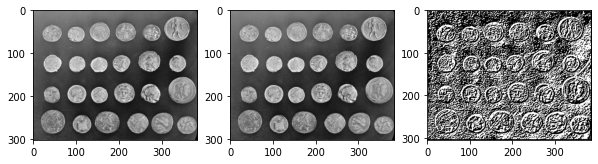

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(coins,cmap='gray')
axes[1].imshow(coins,cmap='gray')
axes[2].imshow(G>0.1,cmap='gray')